# Problem statement
#### (Initial)Deep Network(56) trained on small dataset(60k) resulted in underfitting & low training accuracy(~76%)
* _training speed: good_
* _training accuracy: low_
* _dataset: small (60k images, 10 classes)_
* _layers =56_

## Strategy to beat challenge

| Plan        | AIs          | Comments  |
  | ------------- |:-------------:| -----:|
  | Revise notes from session#1-#4 & note important points      | Feature extraction, Normalization, Channels, Regularization, Data Augmentation, Hyperparameter tuning, Dropout, Optimizers  | Try in parallel tracks |
  | Revise hyperparamter tuning notes from coursera      | underfit=>shallow n/w, more data, low train_acc=>deep n/w, more data, different arch      |   tackle separately |
  | Keep an on MLBLR discussion forum | compression, image resize, start with simpler n/w      |    didn't understand compression, try img resize in last |
| Start with multiple tracks to imrpove train/val accuracy | 1. Data augmentation, 2. Hyperparamter tuning, 3. Deep n/w 4. Network Arch     |    Merge best of individual tracks |

## Solution summary
* Deep network:  Itdid hit train_acc upwards of 87% but was too slow to train (>8hrs) hence not the best solution
* Data Augmentation: Started with max augmentation methods but was hit with & network ended val_acc=0.18@epoch#50 :( but eventually figured out that more augmentation causes regularization & all augmented images might not be helpful hence figured out min augmentation which did show improvement so combined it with other Network Arch track
* Network Arch: shuffling was a great boost & combined with l=2 (calculated from receptive field) was the major breakthrough pushing the network accuracy upwards of 88% in just 2.5hrs !! Reduced layers allowed to set #filters=128 & batch_size=64....bingo !!! combined with data augmentation....val_acc=.9032% :) time taken(sec): 7290.32763671875

_Also hit another model with early stopping at epoch#41 with validation accuracy of .9028% but decided to submit below one with 0.9032 at epoch50_

## Track#1 - Network Arch
### trial#1
* compression = 0.7
* batch_size = 32
* shuffle = True

#### Analysis
shuffle=true makes network learn faster

### trial#2
* compression = 1
* batch_size = 32
* shuffle = True

#### Results
* Epoch 18/20 50000/50000 [==============================] - 384s 8ms/step - loss: 0.4003 - acc: 0.8612 - val_loss: 0.5075 - val_acc: 0.8409

#### Analysis 
Network learning well

### trial#3
_adding time & graphs_
* compression = 1
* batch_size = 32
* shuffle = True
* l = 12
* epoch =50

#### Results
* Epoch 10/50 - loss: 0.5427 - acc: 0.8106 - val_loss: 0.6204 - val_acc: 0.7964
* Epoch 20/50 - loss: 0.3767 - acc: 0.8687 - val_loss: 0.5512 - val_acc: 0.8264
* Epoch 30/50 - loss: 0.3009 - acc: 0.8950 - val_loss: 0.5790 - val_acc: 0.8364
* Epoch 40/50 - loss: 0.2513 - acc: 0.9112 - val_loss: 0.6085 - val_acc: 0.8302
* Epoch 50/50 - loss: 0.2154 - acc: 0.9232 - val_loss: 0.4695 - val_acc: 0.8721

#### Analysis
* network training slowed down drastically from epoch#30 to #50
* slowed training rate also caused n/w to overfit a bit

### trial#4 
* enable bias in both dense & transition blocks and increase dropout to address any overfitting at later stages
* increase filters to allow n/w to learn more features without increasing n/w density
* batch_size = 32
num_classes = 10
epochs = 50
l = 40
num_filter = 16
compression = 1
dropout_rate = 0.25

#### Results

* Epoch 00010: val_acc improved from -inf to 0.76120, saving model to weights_best.hdf5
* Epoch 00020: val_acc improved from 0.76120 to 0.85190, saving model to weights_best.hdf5
* Epoch 00030: val_acc improved from 0.85190 to 0.85380, saving model to weights_best.hdf5
* Epoch 00040: val_acc did not improve from 0.85380
* Epoch 00050: val_acc improved from 0.85380 to 0.87670, saving model to weights_best.hdf5
* Epoch 20/50 50000/50000 [===] - 450s 9ms/step - loss: 0.2982 - acc: 0.8952 - val_loss: 0.4824 - val_acc: 0.8519
* Epoch 30/50 50000/50000 [===] - 450s 9ms/step - loss: 0.2170 - acc: 0.9235 - val_loss: 0.5197 - val_acc: 0.8538
* Epoch 40/50 50000/50000 [===] - 450s 9ms/step - loss: 0.1693 - acc: 0.9393 - val_loss: 0.6405 - val_acc: 0.8387
* Epoch 50/50 50000/50000 [===] - 452s 9ms/step - loss: 0.1394 - acc: 0.9510 - val_loss: 0.4760 - val_acc: 0.8767


#### Analysis
* Best training accuracy - 0.9510 (epoch#50: traninig accuracy 0.9232@trial#3 => 0.9510@trial#4)
* Final validation accuracy improved marginally 0.8721=> 87.67
* After epoch#20, validation accuracy started lagging behind indicating overfitting
_Mistakenly dropout was set to 0.2, correcting to 0.25_

### trial#5
Objective: Regularize network AND maintain/push train_accuracy
* maintaining/pushing train_accuracy: l=12, channels=20
* Regularize to address overfit: data augmentation, bias, dropout
* data augmentation: width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True,
* bias: True for all (dense, transition, FirstConv)
* dropout: 0

#### Results
* Epoch 00010: val_acc improved from -inf to 0.81160, saving model to weights_best.hdf5
* Epoch 00020: val_acc improved from 0.81160 to 0.84130, saving model to weights_best.hdf5
* Epoch 00030: val_acc improved from 0.84130 to 0.88700, saving model to weights_best.hdf5
* Epoch 00040: val_acc improved from 0.88700 to 0.89210, saving model to weights_best.hdf5
* Epoch 00050: val_acc improved from 0.89210 to 0.89950, saving model to weights_best.hdf5

* Epoch 10/50 1562/1562 [===] - 491s 314ms/step - loss: 0.4538 - acc: 0.8432 - val_loss: 0.5676 - val_acc: 0.8116
* Epoch 20/50 1562/1562 [===] - 490s 314ms/step - loss: 0.2871 - acc: 0.9002 - val_loss: 0.4959 - val_acc: 0.8413
* Epoch 30/50 1562/1562 [===] - 490s 314ms/step - loss: 0.2045 - acc: 0.9301 - val_loss: 0.3672 - val_acc: 0.8870
* Epoch 40/50 1562/1562 [===] - 490s 314ms/step - loss: 0.1538 - acc: 0.9450 - val_loss: 0.3773 - val_acc: 0.8921
* Epoch 50/50 1562/1562 [===] - 494s 316ms/step - loss: 0.1269 - acc: 0.9547 - val_loss: 0.3748 - val_acc: 0.8995

#### Analysis
* dropout=0 combined with better data augmentation did help regularization
* network did marginally better on training accuracy

### trial#7
Receptive field concept to arrive #layers - https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807 
```python
import math
import numpy as np

convnet=np.array([[2,1,0],[3,1,0],[5,1,2],[3,2,0],[3,1,1],[3,1,1],[3,1,1],[3,2,0],[6,1,0], [1, 1, 0]])
layer_names = ['conv1','pool1','conv2','pool2','conv3','conv4','conv5','pool5','fc6-conv', 'fc7-conv']
imsize = 32

def calc_op_param(n, r, j)
  for x in range(convnet.shape[0]):
    n=((n-(convnet[x][0])+(2*convnet[x][2]))/convnet[x][1])+1
    r=r+((convnet[x][0])-1)*j
    j=j*convnet[x][1]
    print('layer#',x,'n_out:',n,'r_out:',r,'j_out:',j)
    
# input layer has following parameters
n_in=imsize
r_in=1
j_in=1
start_in=0.5
print(convnet.shape[0])
print(convnet[0][0])

calc_op_param(n_in, r_in, j_in)
```

### trial#7.4
* trial#7 workedbest hence trying same with batch=64

### trial#7.7
try with dropout=0.1

## Track#2 - Data Augmentation
### trial#1
*   imports: time, ModelCheckpoint, ImageDatagenerator
*   No change in hyperparameters: 
            batch_size = 128
            num_classes = 10
            epochs = 50
            l = 40
            num_filter = 12
            compression = 0.5
            dropout_rate = 0.2
* No change in dense/transition/output block
* Added data augmentation

#### Results
* Epoch 00010: val_acc improved from -inf to 0.14490, saving model to weights_best.hdf5
* Epoch 00020: val_acc improved from 0.14490 to 0.17020, saving model to weights_best.hdf5
* Epoch 00030: val_acc did not improve from 0.17020
* Epoch 00040: val_acc did not improve from 0.17020
* Epoch 00050: val_acc improved from 0.17020 to 0.18930, saving model to weights_best.hdf5

#### Training
* Epoch 50/50
321/390 [==============================] - 145s 371ms/step - loss: 0.7760 - acc: 0.7243 - val_loss: 12.0266 - val_acc: 0.1893

#### Analysis
* overfitting hence increase regularization

### trial#2
* set bias True
* increase dropout from 0.2 => 0.5

Results
* no improvements

### trial#3
* try reduced data augmentation

Results
* Epoch 00010: val_acc improved from -inf to 0.38430, saving model to weights_best.hdf5
* Epoch 00020: val_acc improved from 0.38430 to 0.47110, saving model to weights_best.hdf5

Training (interrupted by power off)
* Epoch 27/50
321/390 [==============================] - 214s 548ms/step - loss: 0.8863 - acc: 0.6832 - val_loss: 1.7246 - val_acc: 0.6014

### Analysis
Positive improvements from 18%@epoch#50 to 60%@epoch#28 hence lesser augmentation techniques helped.

### trial#4
* plot history
* include start/end time
* include hyperparameter tuning from hyperparam-trial#2
* decrease dropout: 0.25
* compression: 0.5
* l=12
* batch = 32
* shuffle=True
* augmentation +rotation, +vertical_flip

#### Results

#### Analysis
Train accuracy is abysmally low indicating underfit

### trial#5
* decrease dropout: 0.20
* compression: 1
* l=12
* batch = 32
* shuffle=True
* augmentation +rotation, +vertical_flip

#### Results
* Epoch 35/35
 327/1562  [==============================] - 416s 266ms/step - loss: 0.6746 - acc: 0.7613 - val_loss: 0.7955 - val_acc: 0.7349
 
 #### Analysis
*  Network train & validation performed well together however training accuracy@76% for epoch#35 is far lower than other networks(with just hyperparameter tuning)
* try reducing augmentation methods to help reduce regularization caused by execessive augmentation
* try making n/w deeper with either channel or layer

### trial#6
To make this network train faster as other networks, let's try restricting augmentation to one method 
* datagen = ImageDataGenerator(
    #featurewise_center=False,
    #featurewise_std_normalization=False,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    #vertical_flip=False)
* batch_size = 32
num_classes = 10
epochs = 50
l = 40
num_filter = 12
compression = 1
dropout_rate = 0.25
* remove bias from transition block & keep in dense block

#### Results
* Epoch 00010: val_acc improved from -inf to 0.71670, saving model to weights_best.hdf5
* Epoch 00020: val_acc improved from 0.71670 to 0.78560, saving model to weights_best.hdf5
* Epoch 00030: val_acc improved from 0.78560 to 0.82150, saving model to weights_best.hdf5
* Epoch 20/50 [==============================] - 377s 242ms/step - loss: 0.4676 - acc: 0.8373 - val_loss: 0.6929 - val_acc: 0.7856
* Epoch 30/50 [==============================] - 378s 242ms/step - loss: 0.4008 - acc: 0.8615 - val_loss: 0.5902 - val_acc: 0.8215
* Epoch 39/50 [==============================] - 377s 242ms/step - loss: 0.3541 - acc: 0.8771 - val_loss: 0.5688 - val_acc: 0.8272

#### Analysis
* changes from trail#6 helped train the network faster - restrict data augmentation to "horizontal flip", selective bias, 

#### trial#7
Objective: achieve training accuracy > 97%
* try increasing channels to 16 (taking inspiration from hyperparamter tuning n/w)

## Track#3 - hyperparameter tuning
### trail#1
* dropout = 0.5
* compression = 0.3
* l =12

#### Results
* Epoch 00010: val_acc improved from -inf to 0.35480, saving model to weights_best.hdf5
* Epoch 00020: val_acc improved from 0.35480 to 0.54030, saving model to weights_best.hdf5
* Epoch 00030: val_acc did not improve from 0.54030
* Epoch 00040: val_acc improved from 0.54030 to 0.54440, saving model to weights_best.hdf5
* Epoch 00050: val_acc did not improve from 0.54440

* Epoch 50/50 [==============================] - 104s 2ms/step - loss: 1.1760 - acc: 0.5706 - val_loss: 2.1455 - val_acc: 0.4609

#### Analysis
train & test accuracy both low indicating "underfitting"


### trial#2
* decrease dropout: 0.25
* restore compression: 0.5
* increase layers: 16
* batch_size: 64

#### Results
* Epoch 00010: val_acc improved from -inf to 0.69480, saving model to weights_best.hdf5
* Epoch 00020: val_acc improved from 0.69480 to 0.71180, saving model to weights_best.hdf5
* Epoch 1/50
43776/50000 [=========================>....] - ETA: 34s - loss: 1.7092 - acc: 0.358050000/50000 [==============================] - 293s 6ms/step - loss: 1.6807 - acc: 0.3695 - val_loss: 2.3834 - val_acc: 0.3543
* Epoch 2/50
26240/50000 [==============>...............] - ETA: 2:03 - loss: 1.3981 - acc: 0.485450000/50000 [==============================] - 275s 5ms/step - loss: 1.3700 - acc: 0.4975 - val_loss: 1.8666 - val_acc: 0.4557
------------------
* Epoch 24/50
15104/50000 [========>.....................] - ETA: 3:02 - loss: 0.5948 - acc: 0.791450000/50000 [==============================] - 277s 6ms/step - loss: 0.5945 - acc: 0.7923 - val_loss: 0.8123 - val_acc: 0.7575
* Epoch 25/50
15232/50000 [========>.....................] - ETA: 3:00 - loss: 0.5989 - acc: 0.789550000/50000 [==============================] - 275s 6ms/step - loss: 0.5923 - acc: 0.7930 - val_loss: 0.7605 - val_acc: 0.7583

#### Analysis
Train & Validation accuracies moved very closely to each other indicating network was learning good.

### trial#3
* in l=40, batch=32, dropout=0, bias=false network: test_acc was 97% at epoch#25 but network had overfitting issue
* taking inspiration from above & retatinig best of current network
** l=32
** bias= true
** batch = 32
** droput = 0.25
** compression = 0.5
* shuffle=True

#### Results
* Epoch 00010: val_acc improved from 0.50790 to 0.75000, saving model to weights_best.hdf5
* Epoch 00020: val_acc did not improve from 0.78440
* Epoch 00030: val_acc improved from 0.78440 to 0.82130, saving model to weights_best.hdf5

#### Analysis
Network slowed down on training: 82%@epoch#20  => 87%@epoch#35

### trial#4
Objective: Push network to learn faster epoch#20 onwards
* compression=1
* l=16
* filter=16

## Session topics/notes

Session#1 
1. Convolution
2. Feature extraction
3. Receptive field ( how many layers?)
4. Pooling, 
5. Dimension reductionality, 
6. 1x1 convolution

Session#2 
7. Normalization, 
8. Back Propogation, 
9. Activations, 
10. Gradient descent calculation 

Session#3 
11. Concept of Channels, 
12. Conv Maths,
13. Dialated Conv,
14. Deconv, 
15. Depthwise Conv, 
16. Stride, 
17. Pooling, 
18. 1x1, 
19. Separable Conv, 
20. Grouped Conv, 
21. Dropout, 
22. ResNets 

Session#4 
23. Keras code
24. Sequential & Functional models
25. LSTM
26. Embedding Layers
27. Merge Layers
28. Loss functions
29. Optimizers
30. Image Augmentation

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
import time
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy

In [0]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [0]:
# Hyperparameters
batch_size = 64
num_classes = 10
epochs = 50
l = 2
num_filter = 128
compression = 1
dropout_rate = 0

In [0]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]

# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Dense Block
def add_denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
        Conv2D_3_3 = Conv2D(int(num_filter*compression), (3,3), use_bias=True ,padding='same')(relu)
        if dropout_rate>0:
          Conv2D_3_3 = Dropout(dropout_rate)(Conv2D_3_3)
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

In [0]:
def add_transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = Conv2D(int(num_filter*compression), (1,1), use_bias=True ,padding='same')(relu)
    if dropout_rate>0:
      Conv2D_BottleNeck = Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    
    return avg

In [0]:
def output_layer(input):
    global compression
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    flat = Flatten()(AvgPooling)
    output = Dense(num_classes, activation='softmax')(flat)
    
    return output

In [0]:
num_filter = 128
dropout_rate = 0
l = 2
input = Input(shape=(img_height, img_width, channel,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=True ,padding='same')(input)

First_Block = add_denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = add_transition(First_Block, num_filter, dropout_rate)

Second_Block = add_denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = add_transition(Second_Block, num_filter, dropout_rate)

Third_Block = add_denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = add_transition(Third_Block, num_filter, dropout_rate)

Last_Block = add_denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)


In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 128)  512         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 128)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
# save weights for best val_acc every 10 epochs
filepath='weights_best.hdf5'
checkpoint=ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max', period=10)
callbacks_list = [checkpoint]

Epoch 1/50
781/781 [==============================] - 150s 193ms/step - loss: 1.4878 - acc: 0.4603 - val_loss: 1.4987 - val_acc: 0.5037
Epoch 2/50
124/781 [===>..........................] - ETA: 1:54 - loss: 1.1148 - acc: 0.6103

781/781 [==============================] - 146s 187ms/step - loss: 1.0010 - acc: 0.6445 - val_loss: 1.1140 - val_acc: 0.6435
Epoch 3/50
216/781 [=======>......................] - ETA: 1:38 - loss: 0.8398 - acc: 0.7069

781/781 [==============================] - 146s 187ms/step - loss: 0.7920 - acc: 0.7222 - val_loss: 0.9822 - val_acc: 0.6814
Epoch 4/50
251/781 [========>.....................] - ETA: 1:32 - loss: 0.6915 - acc: 0.7562

781/781 [==============================] - 145s 186ms/step - loss: 0.6730 - acc: 0.7645 - val_loss: 0.7869 - val_acc: 0.7444
Epoch 5/50
264/781 [=========>....................] - ETA: 1:29 - loss: 0.5991 - acc: 0.7920

781/781 [==============================] - 146s 187ms/step - loss: 0.5922 - acc: 0.7939 - val_loss: 1.0974 - val_acc: 0.6470
Epoch 6/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.5310 - acc: 0.8146

781/781 [==============================] - 146s 187ms/step - loss: 0.5264 - acc: 0.8170 - val_loss: 0.6536 - val_acc: 0.7770
Epoch 7/50
270/781 [=========>....................] - ETA: 1:28 - loss: 0.4806 - acc: 0.8330

781/781 [==============================] - 146s 187ms/step - loss: 0.4811 - acc: 0.8332 - val_loss: 0.7076 - val_acc: 0.7715
Epoch 8/50
271/781 [=========>....................] - ETA: 1:28 - loss: 0.4443 - acc: 0.8454

781/781 [==============================] - 146s 186ms/step - loss: 0.4397 - acc: 0.8468 - val_loss: 0.8351 - val_acc: 0.7420
Epoch 9/50
271/781 [=========>....................] - ETA: 1:28 - loss: 0.4037 - acc: 0.8601

781/781 [==============================] - 146s 186ms/step - loss: 0.4097 - acc: 0.8580 - val_loss: 0.5866 - val_acc: 0.8037
Epoch 10/50
270/781 [=========>....................] - ETA: 1:28 - loss: 0.3789 - acc: 0.8685

781/781 [==============================] - 146s 187ms/step - loss: 0.3765 - acc: 0.8702 - val_loss: 0.4971 - val_acc: 0.8393

Epoch 00010: val_acc improved from -inf to 0.83930, saving model to weights_best.hdf5
Epoch 11/50
192/781 [======>.......................] - ETA: 1:42 - loss: 0.3449 - acc: 0.8796

781/781 [==============================] - 146s 187ms/step - loss: 0.3469 - acc: 0.8782 - val_loss: 0.6054 - val_acc: 0.8078
Epoch 12/50
241/781 [========>.....................] - ETA: 1:33 - loss: 0.3159 - acc: 0.8896

781/781 [==============================] - 146s 186ms/step - loss: 0.3280 - acc: 0.8858 - val_loss: 0.5355 - val_acc: 0.8305
Epoch 13/50
259/781 [========>.....................] - ETA: 1:30 - loss: 0.3082 - acc: 0.8927

781/781 [==============================] - 146s 187ms/step - loss: 0.3131 - acc: 0.8916 - val_loss: 0.5201 - val_acc: 0.8368
Epoch 14/50
266/781 [=========>....................] - ETA: 1:29 - loss: 0.2910 - acc: 0.8973

781/781 [==============================] - 146s 187ms/step - loss: 0.2965 - acc: 0.8954 - val_loss: 0.5083 - val_acc: 0.8495
Epoch 15/50
268/781 [=========>....................] - ETA: 1:29 - loss: 0.2683 - acc: 0.9072

781/781 [==============================] - 146s 187ms/step - loss: 0.2701 - acc: 0.9066 - val_loss: 0.4792 - val_acc: 0.8494
Epoch 16/50
268/781 [=========>....................] - ETA: 1:29 - loss: 0.2537 - acc: 0.9122

781/781 [==============================] - 146s 186ms/step - loss: 0.2570 - acc: 0.9108 - val_loss: 0.5444 - val_acc: 0.8303
Epoch 17/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.2337 - acc: 0.9177

781/781 [==============================] - 145s 186ms/step - loss: 0.2448 - acc: 0.9137 - val_loss: 0.4754 - val_acc: 0.8535
Epoch 18/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.2287 - acc: 0.9202

781/781 [==============================] - 145s 186ms/step - loss: 0.2351 - acc: 0.9179 - val_loss: 0.4264 - val_acc: 0.8680
Epoch 19/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.2212 - acc: 0.9235

781/781 [==============================] - 146s 187ms/step - loss: 0.2207 - acc: 0.9224 - val_loss: 0.4168 - val_acc: 0.8790
Epoch 20/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.2088 - acc: 0.9272

781/781 [==============================] - 146s 186ms/step - loss: 0.2162 - acc: 0.9238 - val_loss: 0.3388 - val_acc: 0.8940

Epoch 00020: val_acc improved from 0.83930 to 0.89400, saving model to weights_best.hdf5
Epoch 21/50
190/781 [======>.......................] - ETA: 1:41 - loss: 0.1886 - acc: 0.9332

781/781 [==============================] - 146s 187ms/step - loss: 0.1952 - acc: 0.9317 - val_loss: 0.5035 - val_acc: 0.8499
Epoch 22/50
240/781 [========>.....................] - ETA: 1:33 - loss: 0.1901 - acc: 0.9322

781/781 [==============================] - 145s 186ms/step - loss: 0.1938 - acc: 0.9320 - val_loss: 0.3718 - val_acc: 0.8900
Epoch 23/50
258/781 [========>.....................] - ETA: 1:30 - loss: 0.1894 - acc: 0.9358

781/781 [==============================] - 146s 186ms/step - loss: 0.1891 - acc: 0.9345 - val_loss: 0.4316 - val_acc: 0.8731
Epoch 24/50
265/781 [=========>....................] - ETA: 1:29 - loss: 0.1664 - acc: 0.9442

781/781 [==============================] - 146s 187ms/step - loss: 0.1753 - acc: 0.9388 - val_loss: 0.4370 - val_acc: 0.8733
Epoch 25/50
268/781 [=========>....................] - ETA: 1:29 - loss: 0.1625 - acc: 0.9425

781/781 [==============================] - 146s 186ms/step - loss: 0.1676 - acc: 0.9405 - val_loss: 0.4453 - val_acc: 0.8693
Epoch 26/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.1551 - acc: 0.9452

781/781 [==============================] - 146s 187ms/step - loss: 0.1611 - acc: 0.9432 - val_loss: 0.4524 - val_acc: 0.8759
Epoch 27/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.1479 - acc: 0.9483

781/781 [==============================] - 146s 187ms/step - loss: 0.1528 - acc: 0.9466 - val_loss: 0.4744 - val_acc: 0.8663
Epoch 28/50
269/781 [=========>....................] - ETA: 1:29 - loss: 0.1432 - acc: 0.9506

781/781 [==============================] - 146s 187ms/step - loss: 0.1475 - acc: 0.9479 - val_loss: 0.5008 - val_acc: 0.8616
Epoch 29/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.1391 - acc: 0.9503

781/781 [==============================] - 146s 187ms/step - loss: 0.1415 - acc: 0.9495 - val_loss: 0.5056 - val_acc: 0.8539
Epoch 30/50
268/781 [=========>....................] - ETA: 1:29 - loss: 0.1317 - acc: 0.9535

781/781 [==============================] - 146s 186ms/step - loss: 0.1363 - acc: 0.9519 - val_loss: 0.4971 - val_acc: 0.8729

Epoch 00030: val_acc did not improve from 0.89400
Epoch 31/50
218/781 [=======>......................] - ETA: 1:37 - loss: 0.1258 - acc: 0.9563

781/781 [==============================] - 145s 186ms/step - loss: 0.1314 - acc: 0.9543 - val_loss: 0.6177 - val_acc: 0.8552
Epoch 32/50
250/781 [========>.....................] - ETA: 1:32 - loss: 0.1219 - acc: 0.9549

781/781 [==============================] - 145s 186ms/step - loss: 0.1277 - acc: 0.9546 - val_loss: 0.4177 - val_acc: 0.8868
Epoch 33/50
262/781 [=========>....................] - ETA: 1:29 - loss: 0.1157 - acc: 0.9583

781/781 [==============================] - 146s 187ms/step - loss: 0.1227 - acc: 0.9561 - val_loss: 0.5351 - val_acc: 0.8524
Epoch 34/50
267/781 [=========>....................] - ETA: 1:29 - loss: 0.1178 - acc: 0.9596

781/781 [==============================] - 146s 186ms/step - loss: 0.1177 - acc: 0.9585 - val_loss: 0.5106 - val_acc: 0.8702
Epoch 35/50
268/781 [=========>....................] - ETA: 1:28 - loss: 0.1054 - acc: 0.9623

781/781 [==============================] - 145s 186ms/step - loss: 0.1157 - acc: 0.9585 - val_loss: 0.4835 - val_acc: 0.8722
Epoch 36/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.1086 - acc: 0.9618

781/781 [==============================] - 146s 187ms/step - loss: 0.1076 - acc: 0.9619 - val_loss: 0.4028 - val_acc: 0.8944
Epoch 37/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0983 - acc: 0.9653

781/781 [==============================] - 146s 187ms/step - loss: 0.1101 - acc: 0.9613 - val_loss: 0.4176 - val_acc: 0.8898
Epoch 38/50
269/781 [=========>....................] - ETA: 1:29 - loss: 0.0946 - acc: 0.9669

781/781 [==============================] - 146s 187ms/step - loss: 0.1016 - acc: 0.9642 - val_loss: 0.4213 - val_acc: 0.8888
Epoch 39/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0981 - acc: 0.9648

781/781 [==============================] - 145s 186ms/step - loss: 0.0986 - acc: 0.9650 - val_loss: 0.4999 - val_acc: 0.8728
Epoch 40/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0930 - acc: 0.9681

781/781 [==============================] - 146s 187ms/step - loss: 0.0955 - acc: 0.9667 - val_loss: 0.5452 - val_acc: 0.8745

Epoch 00040: val_acc did not improve from 0.89400
Epoch 41/50
218/781 [=======>......................] - ETA: 1:37 - loss: 0.0882 - acc: 0.9696

781/781 [==============================] - 146s 187ms/step - loss: 0.0992 - acc: 0.9650 - val_loss: 0.4856 - val_acc: 0.8816
Epoch 42/50
250/781 [========>.....................] - ETA: 1:32 - loss: 0.0822 - acc: 0.9713

781/781 [==============================] - 146s 187ms/step - loss: 0.0908 - acc: 0.9680 - val_loss: 0.4314 - val_acc: 0.8931
Epoch 43/50
262/781 [=========>....................] - ETA: 1:30 - loss: 0.0832 - acc: 0.9717

781/781 [==============================] - 146s 187ms/step - loss: 0.0913 - acc: 0.9680 - val_loss: 0.4721 - val_acc: 0.8776
Epoch 44/50
267/781 [=========>....................] - ETA: 1:29 - loss: 0.0903 - acc: 0.9678

781/781 [==============================] - 146s 187ms/step - loss: 0.0902 - acc: 0.9678 - val_loss: 0.4727 - val_acc: 0.8844
Epoch 45/50
268/781 [=========>....................] - ETA: 1:29 - loss: 0.0749 - acc: 0.9722

781/781 [==============================] - 146s 187ms/step - loss: 0.0801 - acc: 0.9710 - val_loss: 0.4561 - val_acc: 0.8913
Epoch 46/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0839 - acc: 0.9709

781/781 [==============================] - 146s 187ms/step - loss: 0.0830 - acc: 0.9708 - val_loss: 0.4448 - val_acc: 0.8892
Epoch 47/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0755 - acc: 0.9743

781/781 [==============================] - 145s 185ms/step - loss: 0.0802 - acc: 0.9722 - val_loss: 0.5253 - val_acc: 0.8817
Epoch 48/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0850 - acc: 0.9703

781/781 [==============================] - 145s 185ms/step - loss: 0.0813 - acc: 0.9721 - val_loss: 0.4241 - val_acc: 0.8989
Epoch 49/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0799 - acc: 0.9716

781/781 [==============================] - 145s 185ms/step - loss: 0.0744 - acc: 0.9738 - val_loss: 0.4859 - val_acc: 0.8919
Epoch 50/50
269/781 [=========>....................] - ETA: 1:28 - loss: 0.0717 - acc: 0.9736

781/781 [==============================] - 145s 186ms/step - loss: 0.0766 - acc: 0.9727 - val_loss: 0.4019 - val_acc: 0.9032

Epoch 00050: val_acc improved from 0.89400 to 0.90320, saving model to weights_best.hdf5
Training started at:  1527544057.0782273  Ended at:  1527551347.405864
time taken(sec): 7290.32763671875
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


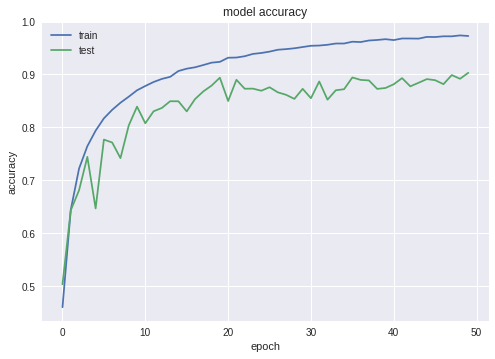

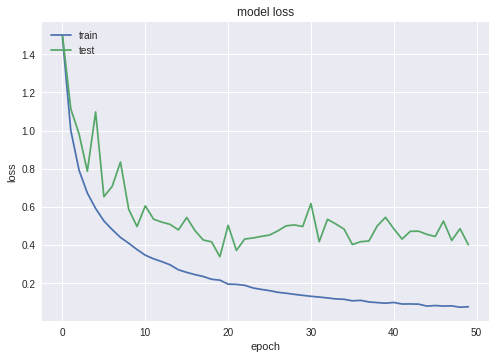

In [0]:

start = time.time()

# history = model.fit(x_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     shuffle=True,
#                     validation_data=(x_test, y_test),
#                     callbacks=callbacks_list
#                     )

datagen = ImageDataGenerator(
                            #featurewise_center=False,
                            #featurewise_std_normalization=False,
                            #rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            horizontal_flip=True,
                            #vertical_flip=False 
                            )

datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
# model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
#                     steps_per_epoch=len(x_train) / 32, epochs=epochs)
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        verbose=1,
                        epochs=epochs,
                        shuffle=True,
                        validation_data=(x_test, y_test),
                        callbacks=callbacks_list)

end = time.time()
print('Training started at: ', start, ' Ended at: ', end)
print('time taken(sec):', end-start)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.40189236931055783
Test accuracy: 0.9032


In [0]:
# Save the trained weights in to .h5 format
model.save_weights("DNST_model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from google.colab import files

files.download('DNST_model.h5')